# Matplotlib backend - Examples

## Plot Ranges/Contours/Maps for different thermal indices

### Operative Temperature vs Relative Humidity

This plot shows the comfort ranges for different thermal indices as a function of operative temperature and relative humidity.

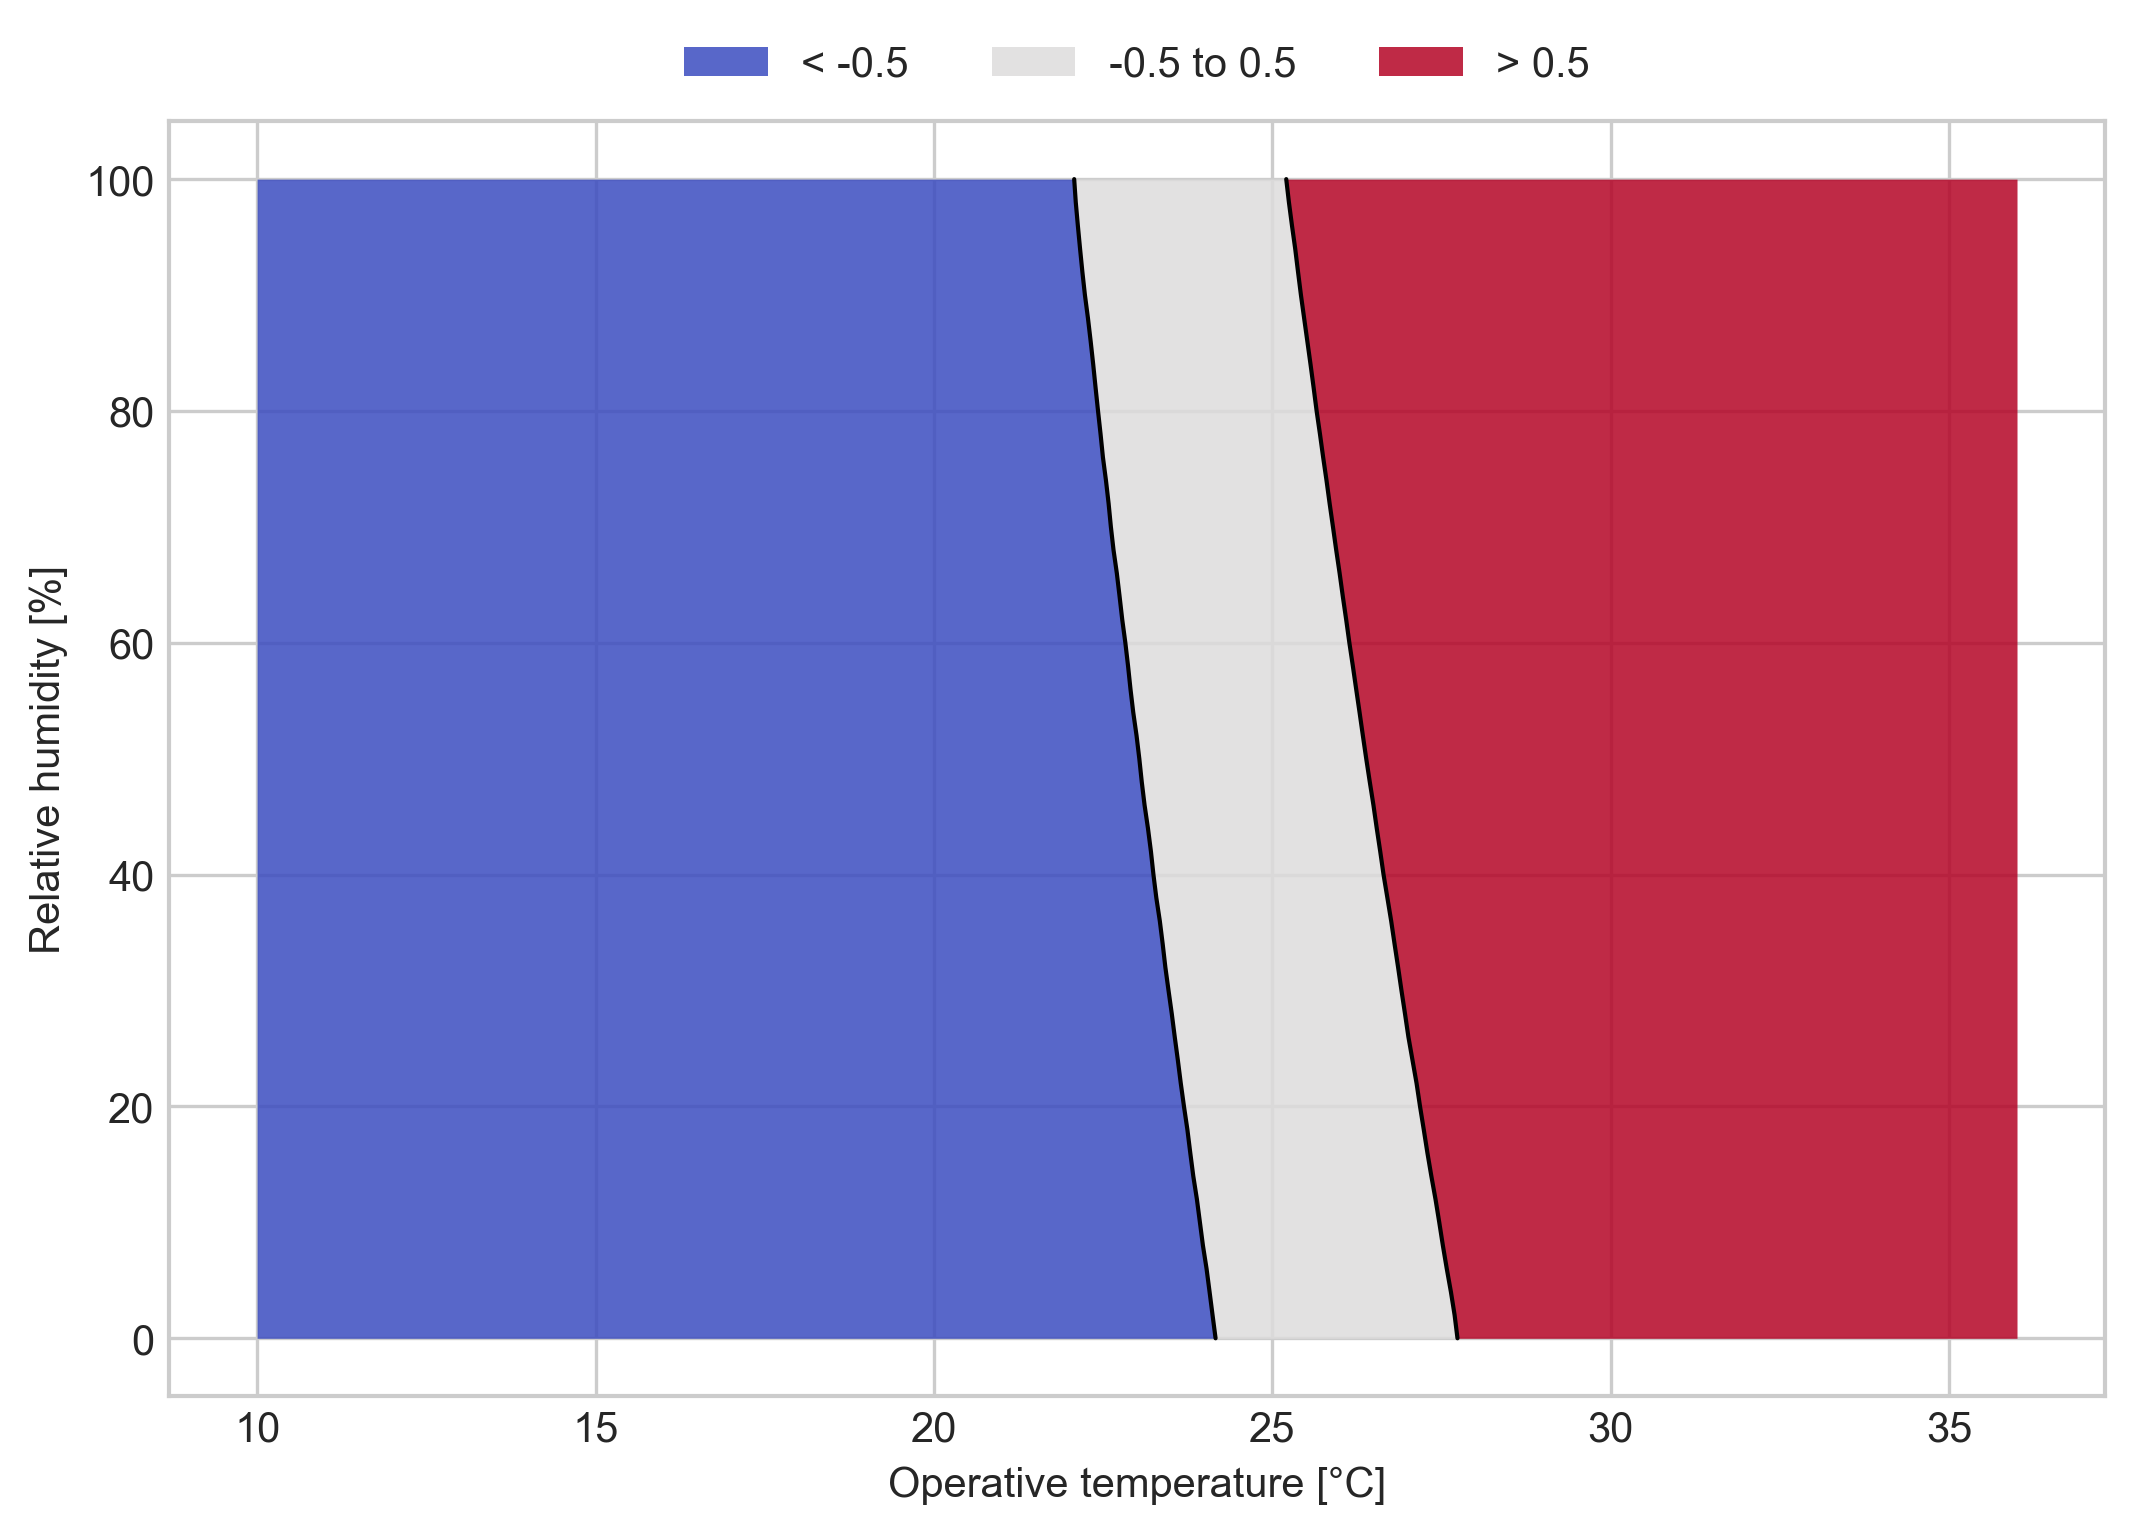

In [1]:
import matplotlib.pyplot as plt

from pythermalcomfort.models import pmv_ppd_iso
from pythermalcomfort.plots.matplotlib import ranges_to_rh

ax, _ = ranges_to_rh(
    model_func=pmv_ppd_iso,
    fixed_params={"met": 1.2, "clo": 0.5, "vr": 0.1, "wme": 0.0},
    thresholds=[-0.5, 0.5],
    t_range=(10, 36),
    rh_range=(0, 100),
)
plt.show()

#### Customization - Look

The plot can be customized by changing the parameters passed to the `ranges_to_rh` function.
The `plot_kwargs` parameter allows users to customize the appearance of the plot by passing additional arguments to the Matplotlib plotting functions.

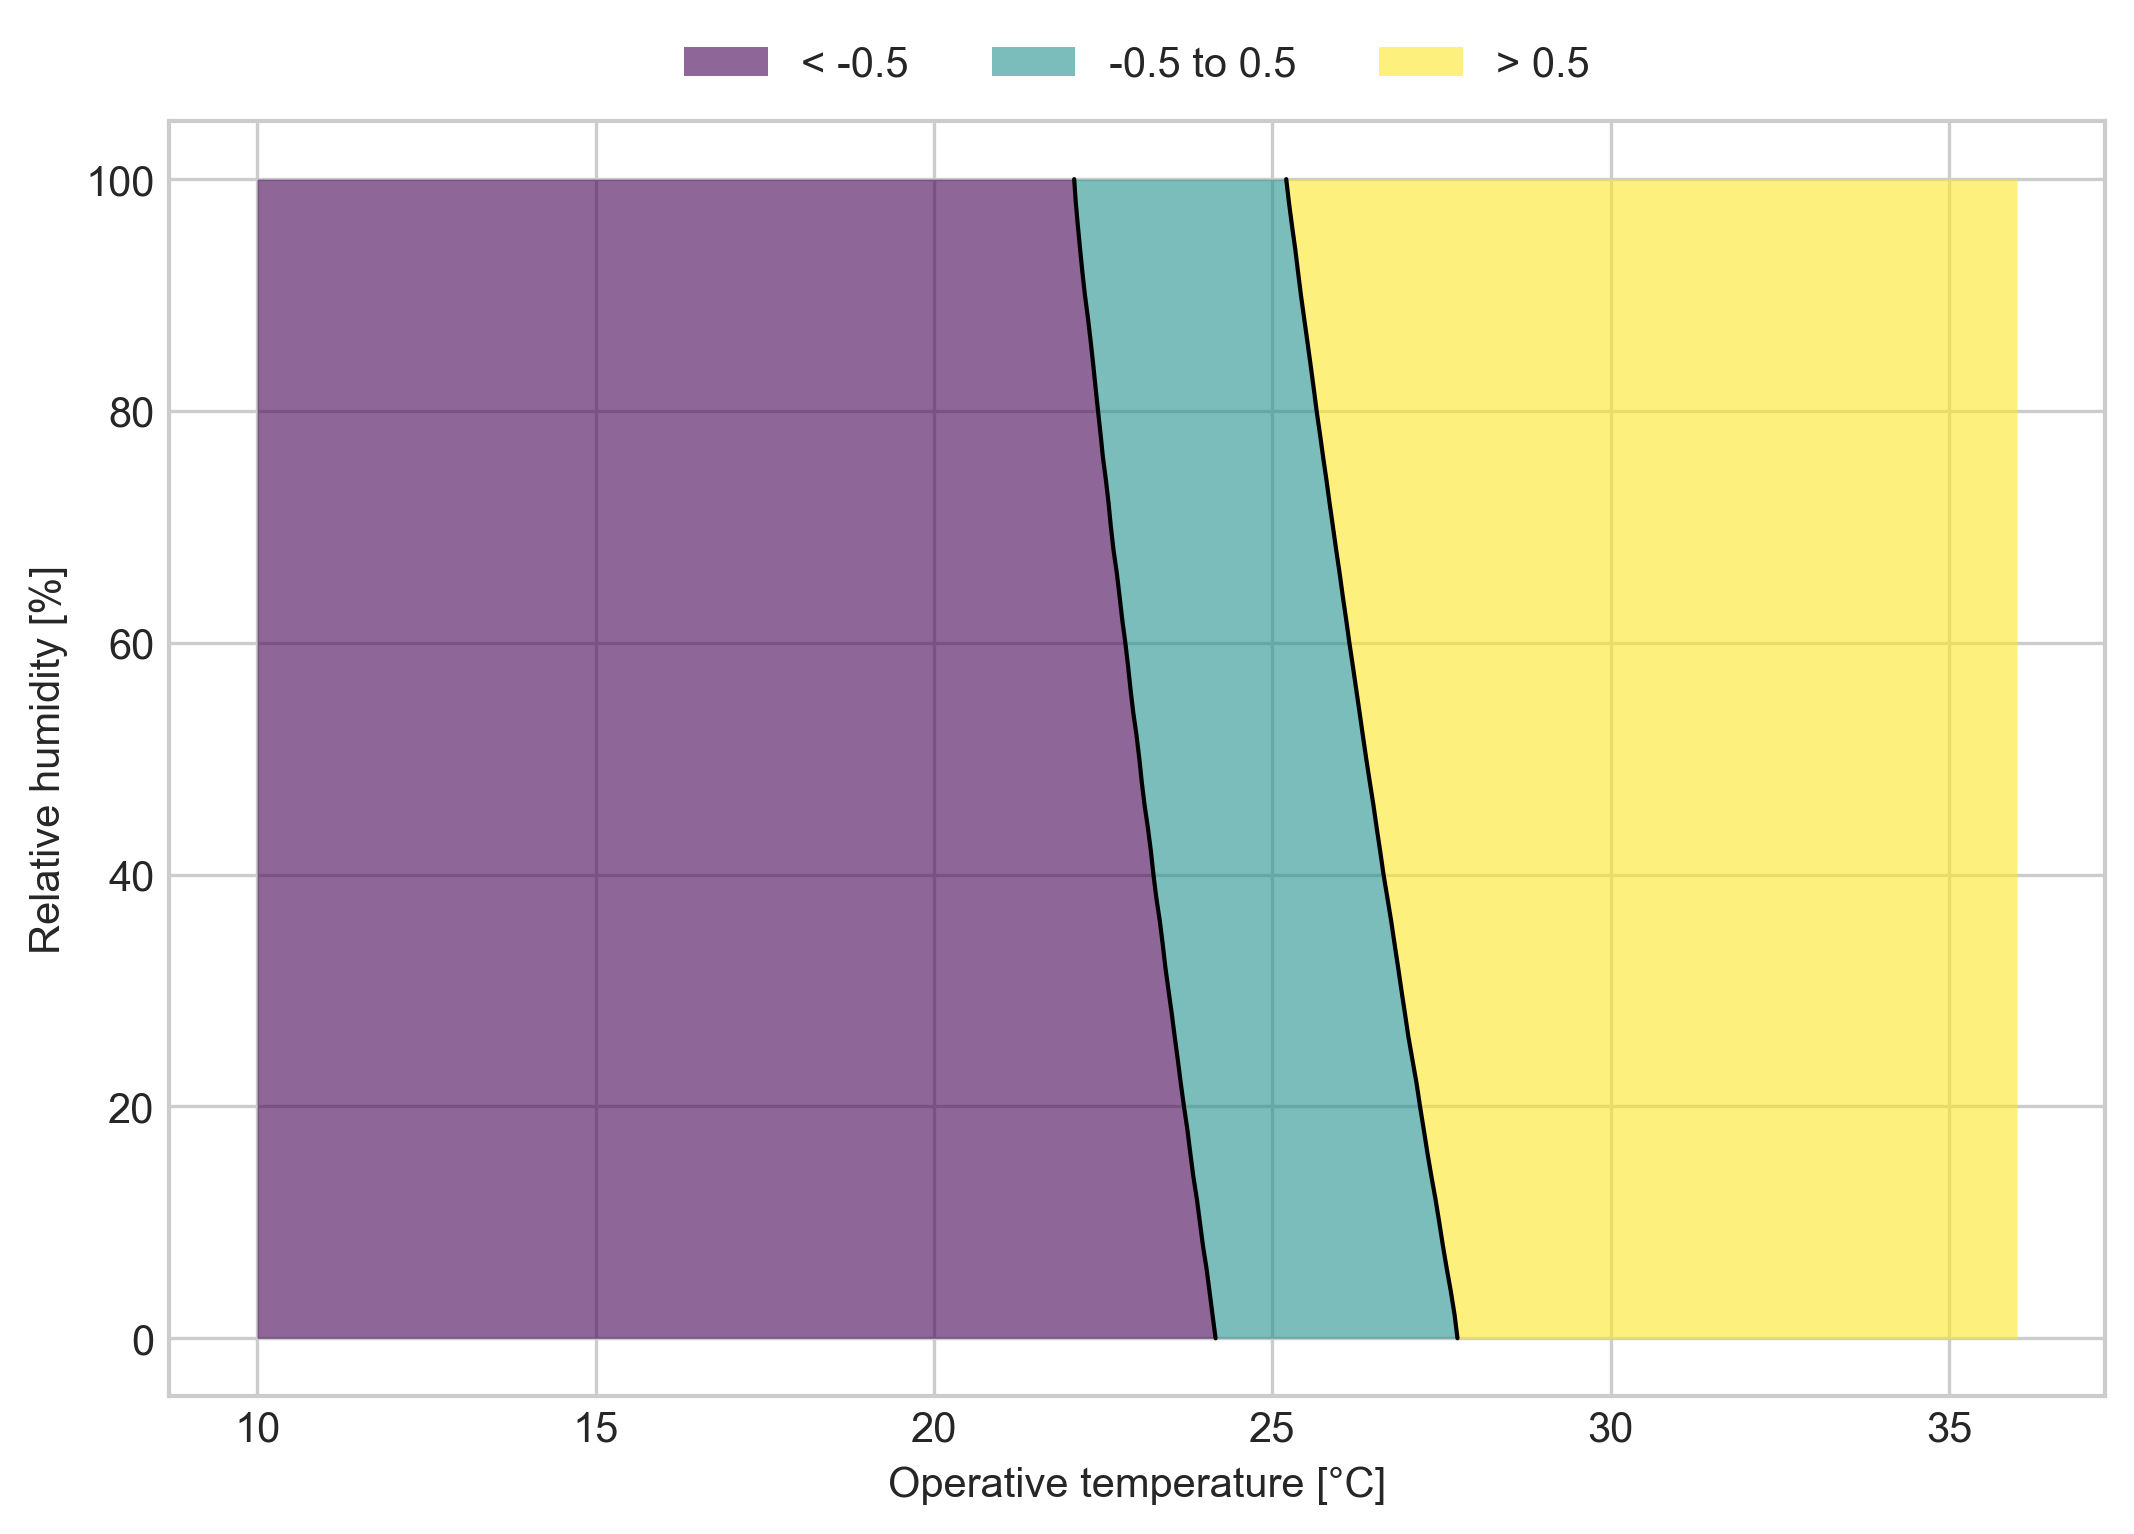

In [7]:
from pythermalcomfort.plots.matplotlib import ranges_to_rh

ax, _ = ranges_to_rh(
    model_func=pmv_ppd_iso,
    fixed_params={"met": 1.2, "clo": 0.5, "vr": 0.1, "wme": 0.0},
    thresholds=[-0.5, 0.5],
    t_range=(10, 36),
    rh_range=(0, 100),
    plot_kwargs={"cmap": "viridis", "band_alpha": 0.6},
)
plt.show()

#### Customization - Highlight specific ranges

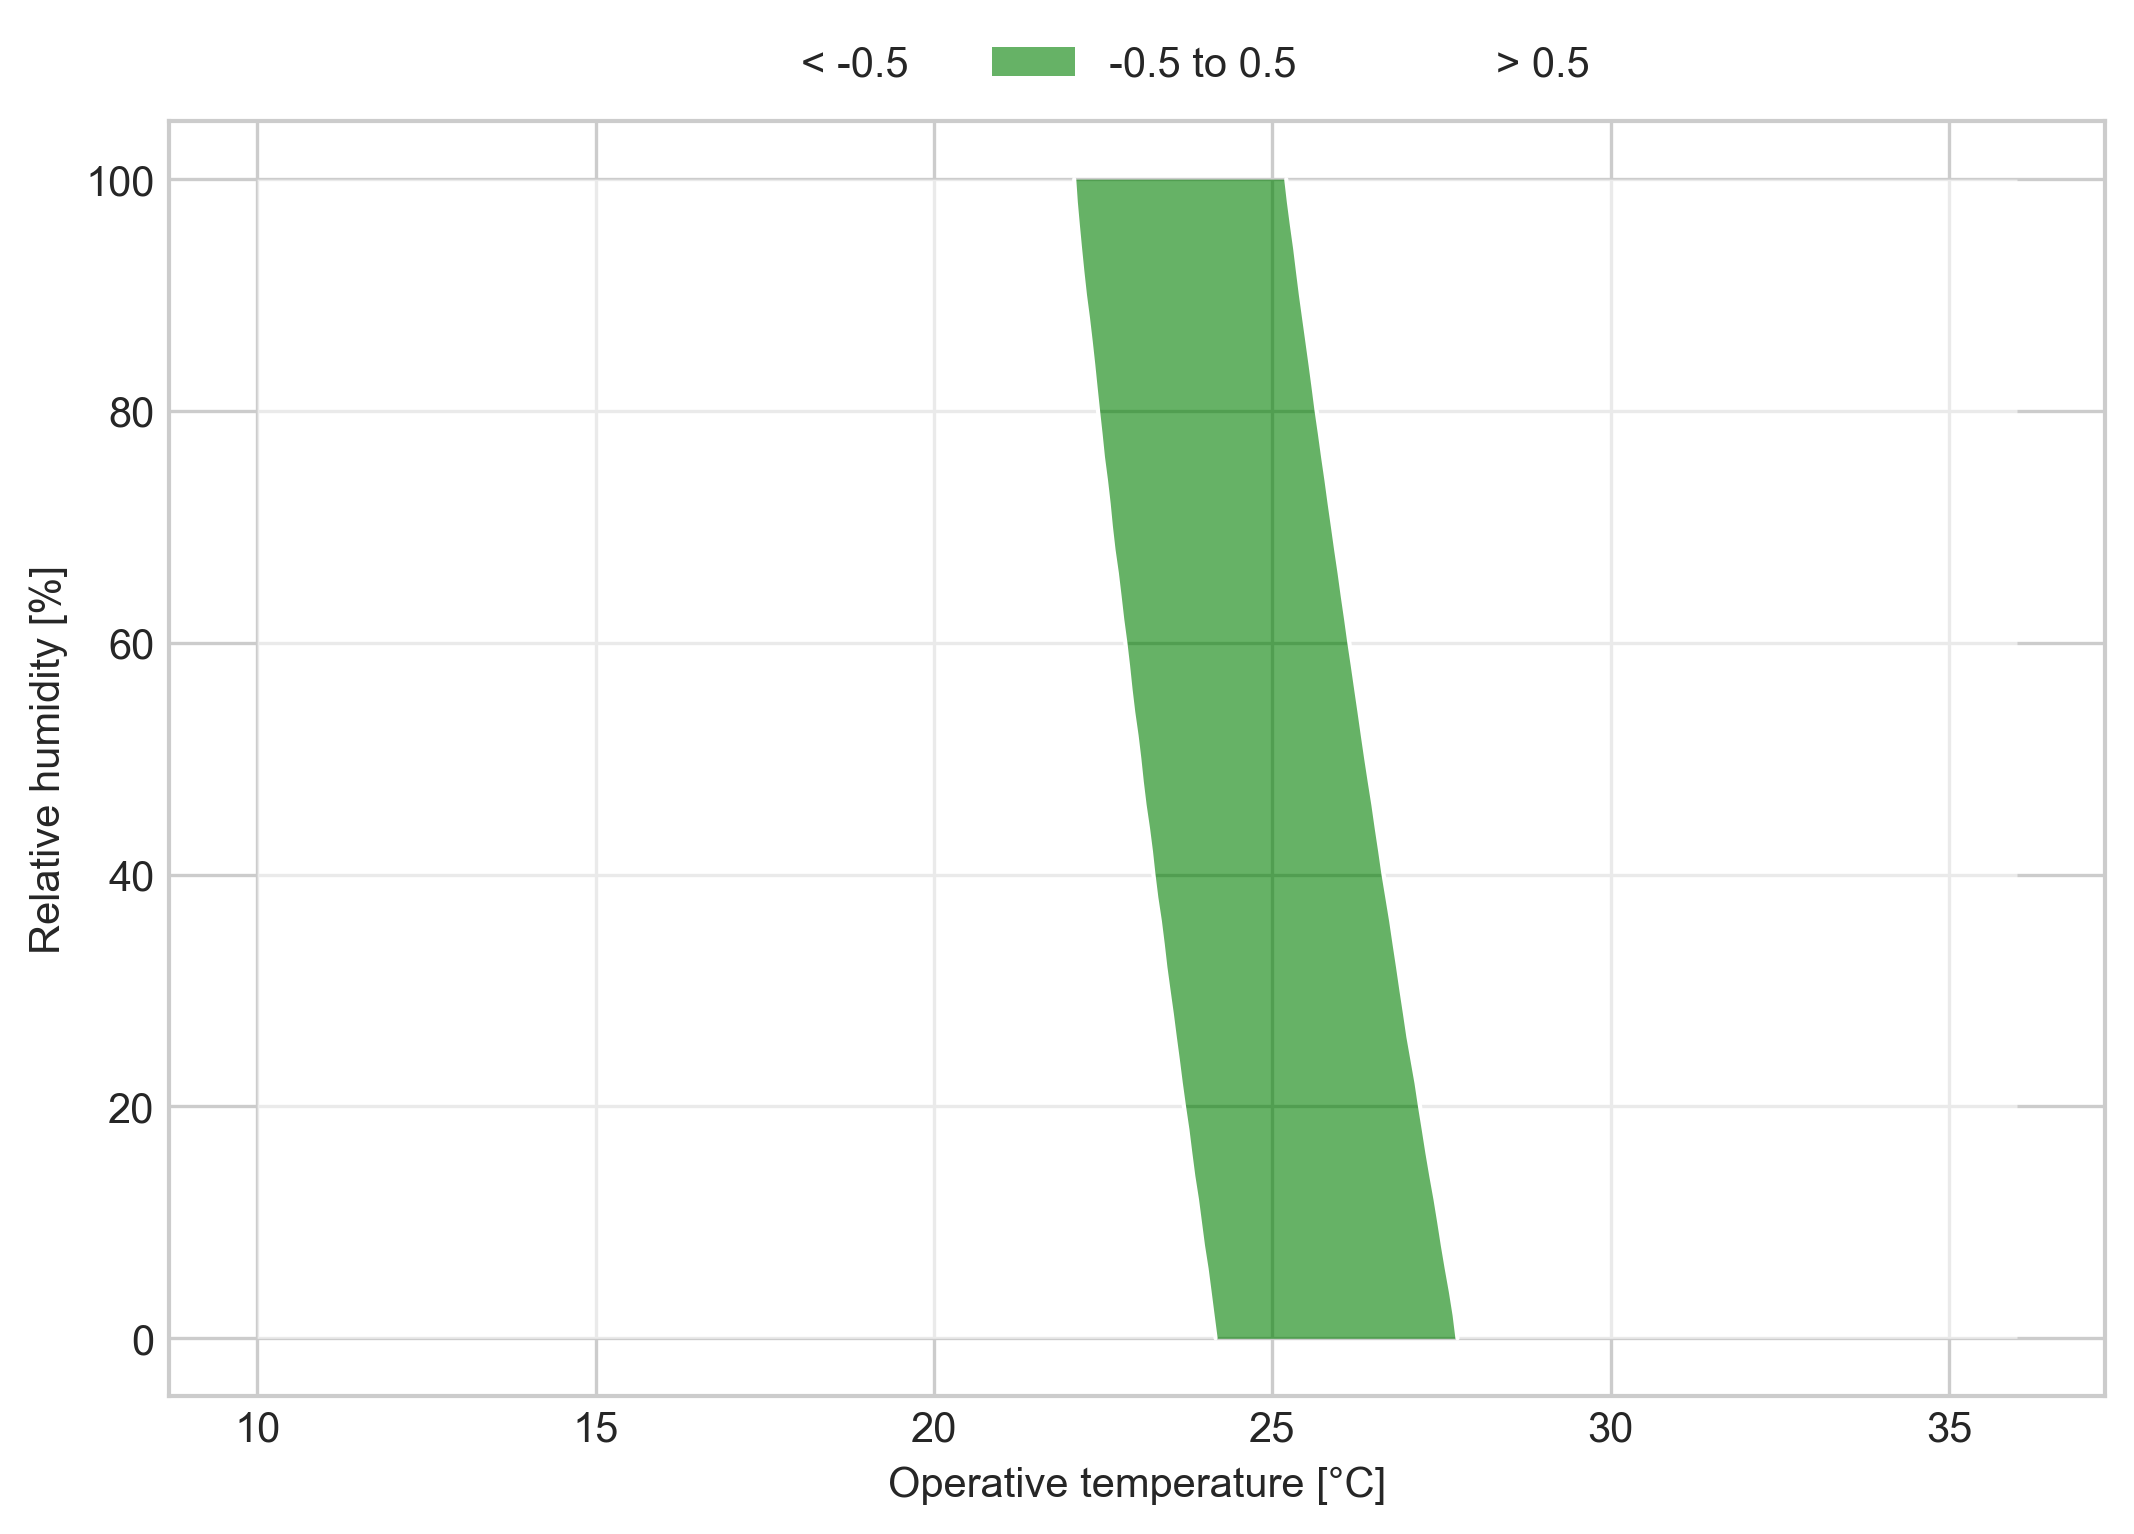

In [7]:
from pythermalcomfort.plots.matplotlib import ranges_to_rh

ax, _ = ranges_to_rh(
    model_func=pmv_ppd_iso,
    fixed_params={"met": 1.2, "clo": 0.5, "vr": 0.1, "wme": 0.0},
    thresholds=[-0.5, 0.5],
    t_range=(10, 36),
    rh_range=(0, 100),
    plot_kwargs={
        "band_colors": ["white", "green", "white"],
        "band_alpha": 0.6,
        "line_color": "white",
    },
)
plt.show()

#### Customization - Change the model

The user is not limited to plot the PMV model, any model with operative temperature and RH as inputs can be used.

In [ ]:
from pythermalcomfort.models import utci
from pythermalcomfort.plots.matplotlib import ranges_to_rh

ax, _ = ranges_to_rh(
    model_func=utci,
    fixed_params={
        "v": 0.1,
    },
    thresholds=[26, 32, 38, 46],  # UTCI risk categories
    t_range=(10, 50),
    rh_range=(0, 100),
    plot_kwargs={"cmap": "plasma", "band_alpha": 0.7},
)
plt.show()

#### Add Scatter Data

In [ ]:
import numpy as np

from pythermalcomfort.plots.matplotlib import ranges_to_rh

# create some synthetic data to plot as a scatter plot
ax, _ = ranges_to_rh(
    model_func=pmv_ppd_iso,
    fixed_params={"met": 1.2, "clo": 0.5, "vr": 0.1, "wme": 0.0},
    thresholds=[-0.5, 0.5],
    t_range=(10, 36),
    rh_range=(0, 100),
)
np.random.seed(0)
t_data = np.random.uniform(10, 36, size=100)
rh_data = np.random.uniform(0, 100, size=100)
sc = ax.scatter(t_data, rh_data, c="black", s=10)
plt.show()

#### Compute and Plot Distribution of Comfort Levels

In [ ]:
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

from pythermalcomfort.plots.matplotlib import ranges_to_rh

# Generate synthetic data
np.random.seed(0)
t_data = np.random.uniform(10, 36, size=100)
rh_data = np.random.uniform(0, 100, size=100)

# Compute PMV for each point
pmv_values = np.array(
    [
        pmv_ppd_iso(
            tdb=t,
            tr=30,
            rh=rh,
            met=1.2,
            clo=0.5,
            vr=0.1,
            wme=0.0,
            limit_inputs=False,
        )["pmv"]
        for t, rh in zip(t_data, rh_data, strict=False)
    ]
)

# Bin PMV values
bins = [-np.inf, -0.5, 0.5, np.inf]
labels = ["PMV < -0.5", "-0.5 ≤ PMV ≤ 0.5", "PMV > 0.5"]
pmv_bin_indices = np.digitize(pmv_values, bins) - 1
counts = np.bincount(pmv_bin_indices, minlength=3)
percentages = 100 * counts / counts.sum()

# Create figure with custom width ratios
fig = plt.figure()
gs = GridSpec(1, 2, width_ratios=[9, 1], wspace=0.05)

# Left: Comfort region + scatter
ax0 = fig.add_subplot(gs[0, 0])
ranges_to_rh(
    model_func=pmv_ppd_iso,
    fixed_params={"met": 1.2, "clo": 0.5, "vr": 0.1, "wme": 0.0},
    thresholds=[-0.5, 0.5],
    t_range=(10, 36),
    rh_range=(0, 100),
    ax=ax0,
    plot_kwargs={"band_alpha": 0.5},
)
sc = ax0.scatter(t_data, rh_data, c="black", s=10, label="Data Points")
ax0.grid(axis="both", linestyle=":", alpha=0.5)
ax0.set(xlim=(10, 36), ylim=(0, 100))

# Number of bins (bands)
n_bands = 3
# Use the same colormap as ranges_tdb_rh (default is often 'RdYlBu')
cmap = mpl.colormaps["coolwarm"].resampled(n_bands)
band_colors = [cmap(i) for i in range(n_bands)]

# Right: Cumulative bar plot
ax1 = fig.add_subplot(gs[0, 1])
bottom = 0
for percentage, color in zip(percentages, band_colors, strict=False):
    ax1.bar("count", percentage, bottom=bottom, alpha=0.5, color=color)
    bottom += percentage
ax1.set_ylim(0, 100)
ax1.set_ylabel("PMV distribution (%)")
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")
ax1.grid("")
for spine in ax1.spines.values():
    spine.set_visible(False)

plt.show()

### Dry Bulb Temperature vs Relative Humidity

This plot shows the comfort ranges for different thermal indices as a function of dry bulb temperature and relative humidity.

```{admonition} Chart interpretation!
Please note that this plot is hard to interpret and might be misleading, as it keeps the mean radiant temperature constant.
It is recommended to use operative temperature instead of dry bulb temperature.
```

In [ ]:
import matplotlib.pyplot as plt

from pythermalcomfort.models import pmv_ppd_iso
from pythermalcomfort.plots.matplotlib import ranges_tdb_rh

ax, _ = ranges_tdb_rh(
    model_func=pmv_ppd_iso,
    fixed_params={"tr": 30, "met": 1.2, "clo": 0.5, "vr": 0.1, "wme": 0.0},
    thresholds=[-0.5, 0.5],
    t_range=(10, 36),
    rh_range=(0, 100),
)
plt.show()

### Psychrometric Chart

In [ ]:
import matplotlib.pyplot as plt

from pythermalcomfort.models import pmv_ppd_iso
from pythermalcomfort.plots.matplotlib import ranges_tdb_psychrometric

ax, _ = ranges_tdb_psychrometric(
    model_func=pmv_ppd_iso,
    fixed_params={
        "tr": 25.0,
        "met": 1.0,
        "clo": 0.61,
        "vr": 0.1,
        "wme": 0.0,
    },
    thresholds=[-0.5, 0.5],
    t_range=(10, 36),
    w_range=(0.0, 0.03),
)
plt.show()